# 01 Extract XY Coordinates

In this notebook, we illustrate how to extract X and Y coordinates from Vector data. We utilize the ``GeoPandas`` package (version >=1.0.1, January 2025) to extract the information.

Vector data is commonly provided as ESRI ``shape`` files, geopackages, or in other vector formats. These files can be loaded with ``GeoPandas`` as ``GeoDataFrames``. Each geometry object is stored as ``shapely`` object within the ``GeoSeries`` ``geometry`` of the ``GeoDataFrames``. The basic ``shapely`` objects, also called ``Base Geometries``, used here are:

* Points/Multi-Points
* Lines/Multi-Lines
* Polygons/Multi-Polygons
* Geometry Collections

The first step is to load the data using ``GeoPandas``. We can inspect the different columns of the GeoDataFrame by looking at its head. In the following examples for point, line and polygon data, we have an ``id`` column which was created during the digitalizing of the data in QGIS, a formation column containing the name of a geological unit (this becomes important later for the actual modeling) and most importantly the geometry column consisting of the ``shapely`` geometry objects. The X and Y coordinates of the different geometry objects can then be extracted using ``extract_xy()`` of the GemGIS vector module.

<img src="../images/tutorial01_cover.png">


## Set File Paths and download Tutorial Data

If you downloaded the latest `GemGIS` version from the Github repository, append the path so that the package can be imported successfully. Otherwise, it is recommended to install `GemGIS` via `pip install gemgis` and import `GemGIS` using `import gemgis as gg`. In addition, the file path to the folder where the data is being stored is set. The tutorial data is downloaded using Pooch (https://www.fatiando.org/pooch/latest/index.html) and stored in the specified folder. Use `pip install pooch` if Pooch is not installed on your system yet.

In [1]:
import gemgis as gg

file_path ='data/01_extract_xy/'

In [2]:
gg.download_gemgis_data.download_tutorial_data(filename="01_extract_xy.zip", dirpath=file_path)

## Point Data

The point data stored as shape file will be loaded as ``GeoDataFrame``. It contains an ``id``, ``formation`` and the ``geometry`` column.

In [3]:
import geopandas as gpd

gdf = gpd.read_file(file_path + 'interfaces_points.shp')

gdf.head()

,id,formation,geometry
0,NaN,Ton,POINT (19.15013 293.31349)
1,NaN,Ton,POINT (61.93437 381.45933)
2,NaN,Ton,POINT (109.35786 480.94557)
3,NaN,Ton,POINT (157.8123 615.99943)
4,NaN,Ton,POINT (191.31803 719.09398)


### Inspecting the geometry column

The elements of the geometry columns can be accessed by indexing the GeoDataFrame. It can be seen that the objects in the ``geometry`` column are Shapely objects.

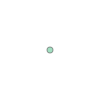

In [4]:
gdf.loc[0].geometry

In [5]:
gdf.loc[0].geometry.wkt

'POINT (19.150128045807676 293.313485355882)'

In [6]:
type(gdf.loc[0].geometry)

shapely.geometry.point.Point

### Extracting the Coordinates

To make the coordinates easier accessible, we use the GemGIS function ``extract_xy`` to append the stored ``X`` and ``Y`` coordinate information to the GeoDataFrame.

The resulting GeoDataFrame has now an additional ``X`` and ``Y`` column containing the coordinates of the point objects. These can now be easily used for further processing. The geometry types of the shapely objects remained unchanged. The ``id`` column was dropped by default but can be kept if needed (``drop_id=False``).


In [7]:
gdf_xy = gg.vector.extract_xy(gdf=gdf)

gdf_xy.head()

,formation,geometry,X,Y
0,Ton,POINT (19.15013 293.31349),19.15,293.31
1,Ton,POINT (61.93437 381.45933),61.93,381.46
2,Ton,POINT (109.35786 480.94557),109.36,480.95
3,Ton,POINT (157.8123 615.99943),157.81,616.00
4,Ton,POINT (191.31803 719.09398),191.32,719.09


### Plotting the Data

The figures below show the original point data and the extracted X and Y data using ``matplotlib``.

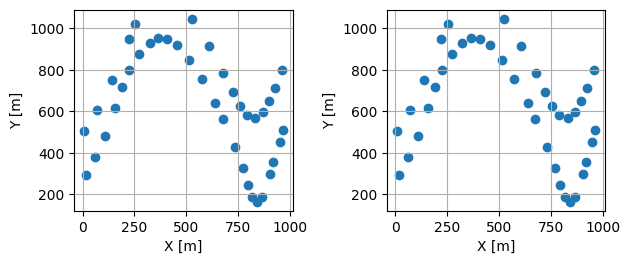

In [8]:
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2)

gdf.plot(ax=ax1, aspect='equal')
ax1.set_xlabel('X [m]')
ax1.set_ylabel('Y [m]')
ax1.grid()

gdf_xy.plot(ax=ax2, aspect='equal')
ax2.set_xlabel('X [m]')
ax2.set_ylabel('Y [m]')
ax2.grid()

plt.tight_layout()

## Line Data

The line data stored as shape file will be loaded as GeoDataFrame. It consists of the same columns as the shape file containing points. 

In [9]:
import geopandas as gpd
import gemgis as gg

gdf = gpd.read_file(file_path + 'interfaces_lines.shp')

gdf.head()

,id,formation,geometry
0,NaN,Sand1,"LINESTRING (0.25633 264.86215, 10.59347 276.73..."
1,NaN,Ton,"LINESTRING (0.18819 495.78721, 8.84067 504.141..."
2,NaN,Ton,"LINESTRING (970.67663 833.05262, 959.37243 800..."


### Inspecting the geometry column

The elements of the geometry columns can be accessed by indexing the GeoDataFrame. It can be seen that the objects in the ``geometry`` column are Shapely objects.

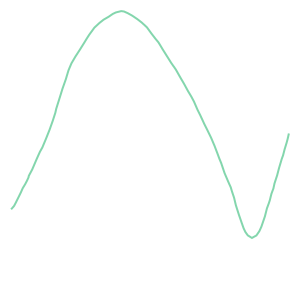

In [10]:
gdf.loc[0].geometry

In [11]:
gdf.loc[0].geometry.wkt[:100]

'LINESTRING (0.256327195431048 264.86214748436396, 10.59346813871597 276.73370778641777, 17.134940141'

In [12]:
type(gdf.loc[0].geometry)

shapely.geometry.linestring.LineString

### Extracting the Coordinates to Point Objects

To make the coordinates easier accessible, we use the GemGIS function ``extract_xy`` to append the stored ``X`` and ``Y`` coordinate information to the GeoDataFrame. 

The resulting GeoDataFrame has now an additional ``X`` and ``Y`` column. These values represent the single vertices of each LineString. The geometry types of the Shapely objects in the GeoDataFrame were converted from LineStrings to Points to match the X and Y column data. The ``id`` column was dropped by default but can be kept if needed (``drop_id=False``). Information stored in additional columns, here the ``formation``, are populated to the respective points extracted from each LineString. The index of the new GeoDataFrame was reset. If the original index is needed, you can set ``reset_index=False``.


In [13]:
gdf_xy = gg.vector.extract_xy(gdf=gdf)

gdf_xy.head()

,formation,geometry,X,Y
0,Sand1,POINT (0.25633 264.86215),0.26,264.86
1,Sand1,POINT (10.59347 276.73371),10.59,276.73
2,Sand1,POINT (17.13494 289.08982),17.13,289.09
3,Sand1,POINT (19.15013 293.31349),19.15,293.31
4,Sand1,POINT (27.79512 310.57169),27.80,310.57


### Plotting the Data

The figures below show the original line data and the extracted point data with the respective X and Y data using ``matplotlib``. It can be seen that the single vertices the original LineStrings were made of were extracted.


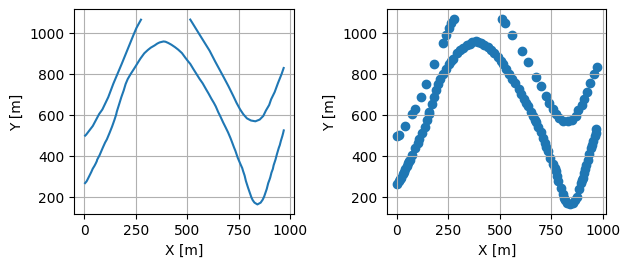

In [14]:
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2)

gdf.plot(ax=ax1, aspect='equal')
ax1.set_xlabel('X [m]')
ax1.set_ylabel('Y [m]')
ax1.grid()

gdf_xy.plot(ax=ax2, aspect='equal')
ax2.set_xlabel('X [m]')
ax2.set_ylabel('Y [m]')
ax2.grid()

plt.tight_layout()

### Extracting the Coordinates to list of X and Y coordinates in separate cells

The coordinates of LineStrings in a GeoDataFrame can also be extracted and are stored as lists in respective X and Y columns using ``extract_xy_linestring(..)``. This function is being accessed by ``extract_xy`` to extract the coordinates from vertices in LineStrings. 

In [15]:
gdf_xy = gg.vector.extract_xy_linestring(gdf=gdf)
gdf_xy

,id,formation,geometry,X,Y
0,NaN,Sand1,"LINESTRING (0.25633 264.86215, 10.59347 276.73...","[0.256327195431048, 10.59346813871597, 17.1349...","[264.86214748436396, 276.73370778641777, 289.0..."
1,NaN,Ton,"LINESTRING (0.18819 495.78721, 8.84067 504.141...","[0.1881868620686138, 8.840672956663411, 41.092...","[495.787213546976, 504.1418419288791, 546.4230..."
2,NaN,Ton,"LINESTRING (970.67663 833.05262, 959.37243 800...","[970.6766251230017, 959.3724321757514, 941.291...","[833.052616499831, 800.0232029873156, 754.8012..."


## Polygon Data

The polygon data stored as shape file will be loaded as GeoDataFrame. It can be seen that the objects in the geometry column are Shapely objects.

In [16]:
import geopandas as gpd
import gemgis as gg

gdf = gpd.read_file(file_path + 'interfaces_polygons.shp')

gdf.head()

,id,formation,geometry
0,NaN,Sand1,"POLYGON ((0.25633 264.86215, 10.59347 276.7337..."
1,NaN,Ton,"POLYGON ((0.25633 264.86215, 0.18819 495.78721..."
2,NaN,Sand2,"POLYGON ((0.18819 495.78721, 0.24897 1068.7595..."
3,NaN,Sand2,"POLYGON ((511.67477 1068.85246, 971.69794 1068..."


### Inspecting the geometry column

The elements of the geometry columns can be accessed by indexing the GeoDataFrame. It can be seen that the objects in the ``geometry`` column are Shapely objects.

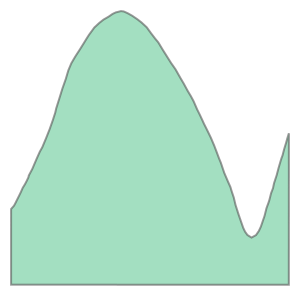

In [17]:
gdf.loc[0].geometry

In [18]:
gdf.loc[0].geometry.wkt[:100]

'POLYGON ((0.256327195431048 264.86214748436396, 10.59346813871597 276.73370778641777, 17.13494014188'

In [19]:
type(gdf.loc[0].geometry)

shapely.geometry.polygon.Polygon

### Extracting the Coordinates to Point Objects

To make the coordinates easier accessible, we use the GemGIS function ``extract_xy`` to append the stored ``X`` and ``Y`` coordinate information to the GeoDataFrame. 

The resulting GeoDataFrame has now an additional ``X`` and ``Y`` column. These values represent the single vertices of each LineString. The geometry types of the Shapely objects in the GeoDataFrame were converted from Polygons to Points to match the X and Y column data. The ``id`` column was dropped by default but can be kept if needed (``drop_id=False``). Information stored in additional columns, here the ``formation``, are populated to the respective points extracted from each LineString. The index of the new GeoDataFrame was reset. If the original index is needed, you can set ``reset_index=False``.


In [20]:
gdf_xy = gg.vector.extract_xy(gdf=gdf)

gdf_xy.head()

,formation,geometry,X,Y
0,Sand1,POINT (0.25633 264.86215),0.26,264.86
1,Sand1,POINT (10.59347 276.73371),10.59,276.73
2,Sand1,POINT (17.13494 289.08982),17.13,289.09
3,Sand1,POINT (19.15013 293.31349),19.15,293.31
4,Sand1,POINT (27.79512 310.57169),27.80,310.57


### Plotting the Data

The figures below show the original polygon data and the extracted point data with the respective X and Y data using ``matplotlib``. It can be seen that the single vertices the original Polygons were made of were extracted.


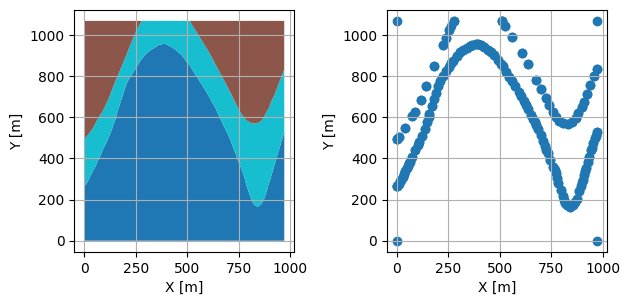

In [21]:
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2)

gdf.plot(ax=ax1, column='formation', aspect='equal')
ax1.set_xlabel('X [m]')
ax1.set_ylabel('Y [m]')
ax1.grid()

gdf_xy.plot(ax=ax2, aspect='equal')
ax2.set_xlabel('X [m]')
ax2.set_ylabel('Y [m]')
ax2.grid()

plt.tight_layout()

### Removing the corner points of the polygons

In the above plot, it can be seen, that the corner points are still present in the extracted X and Y point pairs. The additional argument ``remove_total_bounds`` can be used to remove vertices that are equal to either of the total bounds of the polygon gdf.

The total bounds of the original gdf:

In [22]:
gdf.total_bounds

array([ 1.88186862e-01, -6.89945891e-03,  9.72088904e+02,  1.06885246e+03])

The length of the extracted vertices:

In [23]:
len(gdf_xy)

269

Extracting the vertices but removing the total bounds. A total of 18 points were removed that were within 0.1 units of the total bounds. 

In [24]:
gdf_xy_without_bounds = gg.vector.extract_xy(gdf=gdf, remove_total_bounds=True, threshold_bounds=0.1)
print(len(gdf_xy_without_bounds))
gdf_xy_without_bounds.head()

251


,formation,geometry,X,Y
1,Sand1,POINT (10.59347 276.73371),10.59,276.73
2,Sand1,POINT (17.13494 289.08982),17.13,289.09
3,Sand1,POINT (19.15013 293.31349),19.15,293.31
4,Sand1,POINT (27.79512 310.57169),27.80,310.57
5,Sand1,POINT (34.41735 324.13919),34.42,324.14


The removal of the points can also be inspected visually.

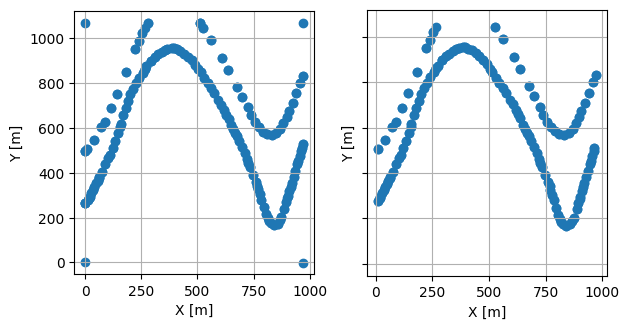

In [25]:
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2, sharey=True)

gdf_xy.plot(ax=ax1, aspect='equal')
ax1.set_xlabel('X [m]')
ax1.set_ylabel('Y [m]')
ax1.grid()

gdf_xy_without_bounds.plot(ax=ax2, aspect='equal')
ax2.set_xlabel('X [m]')
ax2.set_ylabel('Y [m]')
ax2.grid()

plt.tight_layout()

## Geometry Collections

Geometry collections contain different types of geometries. Here, a GeoDataFrame is created with one GeometryCollection object and two LineStrings.

In [26]:
from shapely.geometry import LineString
import geopandas as gpd
import gemgis as gg

line1 = LineString([(0, 0), (1, 1), (1, 2), (2, 2)])
line2 = LineString([(0, 0), (1, 1), (2, 1), (2, 2)])
collection = line1.intersection(line2)

In [27]:
type(collection)

shapely.geometry.collection.GeometryCollection

### Creating the GeoDataFrame with different geom_types

In [28]:
gdf = gpd.GeoDataFrame(geometry=[collection, line1, line2])
gdf

,geometry
0,"GEOMETRYCOLLECTION (LINESTRING (0 0, 1 1), POI..."
1,"LINESTRING (0 0, 1 1, 1 2, 2 2)"
2,"LINESTRING (0 0, 1 1, 2 1, 2 2)"


### Extracting the Coordinates

The resulting GeoDataFrame has now an additional ``X`` and ``Y`` column. These values represent the single vertices of each Polygon. The geometry types of the shapely objects in the GeoDataFrame were converted from Polygons to Points to match the X and Y column data. The ``id`` column was dropped by default. The index of the new GeoDataFrame was reset.

**NB: By default, points within a geometry collection are dropped as they usually do not represent true layer boundaries and rather corner points.**

In [29]:
gdf_xy = gg.vector.extract_xy(gdf=gdf)

gdf_xy

,geometry,X,Y
0,POINT (0 0),0.00,0.00
1,POINT (1 1),1.00,1.00
2,POINT (0 0),0.00,0.00
3,POINT (1 1),1.00,1.00
4,POINT (1 2),1.00,2.00
5,POINT (2 2),2.00,2.00
6,POINT (0 0),0.00,0.00
7,POINT (1 1),1.00,1.00
8,POINT (2 1),2.00,1.00
9,POINT (2 2),2.00,2.00


### Plotting the Data

The figures below show the original polygon data and the extracted point data with the respective X and Y data with ``matplotlib``. Note the point in the upper right of the left plot which was dropped during the extraction of the vertices.


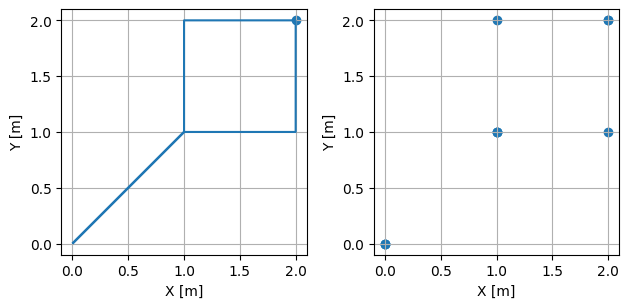

In [30]:
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2)

gdf.plot(ax=ax1, aspect='equal')
ax1.set_xlabel('X [m]')
ax1.set_ylabel('Y [m]')
ax1.grid()

gdf_xy.plot(ax=ax2, aspect='equal')
ax2.set_xlabel('X [m]')
ax2.set_ylabel('Y [m]')
ax2.grid()

plt.tight_layout()

## Additional Arguments

Several additional arguments can be passed to adapt the functionality of the function. For further reference, see the [API Reference for extract_xy](https://gemgis.readthedocs.io/en/latest/getting_started/reference/vector_api/gemgis.vector.extract_xy.html#gemgis.vector.extract_xy).

* reset_index (bool)
* drop_id (bool)
* drop_level0 (bool)
* drop_level1 (bool)
* drop_index (bool)
* drop_points (bool)
* overwrite_xy (bool)
* target_crs(str, pyproj.crs.crs.CRS)
* bbox (list)
* remove_total_bounds (bool)
* threshold_bounds (float, int)

### Original Function

Original function with default values of arguments.

In [31]:
gdf_xy = gg.vector.extract_xy(gdf=gdf,
                              reset_index=True,
                              drop_id=True,
                              drop_level0=True,
                              drop_level1=True, 
                              drop_index=True, 
                              drop_points=True,
                              overwrite_xy=True, 
                              target_crs=gdf.crs,
                              bbox = None)

gdf_xy.head()

,geometry,X,Y
0,POINT (0 0),0.00,0.00
1,POINT (1 1),1.00,1.00
2,POINT (0 0),0.00,0.00
3,POINT (1 1),1.00,1.00
4,POINT (1 2),1.00,2.00


### Avoid resetting the index and do not drop ID column

This time, the index is not reset and the id column is not dropped. 

In [32]:
gdf_xy = gg.vector.extract_xy(gdf=gdf,
                              reset_index=False,
                              drop_id=False,
                              drop_level0=True,
                              drop_level1=True, 
                              drop_index=False, 
                              drop_points=False,
                              overwrite_xy=True, 
                              target_crs=gdf.crs,
                              bbox = None)

gdf_xy.head()

,level_0,level_1,geometry,points,X,Y
0,0,0,POINT (0 0),"[0.0, 0.0]",0.00,0.00
0,0,0,POINT (1 1),"[1.0, 1.0]",1.00,1.00
1,1,0,POINT (0 0),"[0.0, 0.0]",0.00,0.00
1,1,0,POINT (1 1),"[1.0, 1.0]",1.00,1.00
1,1,0,POINT (1 2),"[1.0, 2.0]",1.00,2.00


### Resetting the index and keeping index columns

The index is reset but the previous index columns ``level_0`` and ``level_1`` are kept.

In [33]:
gdf_xy = gg.vector.extract_xy(gdf=gdf,
                              reset_index=True,
                              drop_id=False,
                              drop_level0=False,
                              drop_level1=False, 
                              drop_index=False, 
                              drop_points=False,
                              overwrite_xy=True, 
                              target_crs=gdf.crs,
                              bbox = None)

gdf_xy.head()

,index,level_0,level_1,geometry,points,X,Y
0,0,0,0,POINT (0 0),"[0.0, 0.0]",0.00,0.00
1,0,0,0,POINT (1 1),"[1.0, 1.0]",1.00,1.00
2,1,1,0,POINT (0 0),"[0.0, 0.0]",0.00,0.00
3,1,1,0,POINT (1 1),"[1.0, 1.0]",1.00,1.00
4,1,1,0,POINT (1 2),"[1.0, 2.0]",1.00,2.00


## Background Functions

The function `extract_xy` is a combination of the following functions:

- `extract_xy_points`
- `extract_xy_linestrings`
- `explode_geometry_collection`
- `explode_multilinestrings`
- `explode_polygons`
- `set_dtype`

For more information of these functions see the [API Reference](https://gemgis.readthedocs.io/en/latest/getting_started/reference/vector_api/gemgis.vector.extract_xy.html#gemgis.vector.extract_xy).